In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

In [3]:
df = pd.read_csv('total_data(학력포함) (1).csv')

### xdata로 상관계수가 높은 column을 넣어서 Ridge
- elasticnet으로 상관계수가 높은 feature를 넣어 모델생성

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
# 필요 패키지 로드
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
df

,jur_stn,year,sgg_nm,child,house,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,popu_합계,...,인구대비고학력자,popu_u20,popu_o60,for_u20,for_2030,q1,q2,q3,q4,q5
0,서울중부경찰서,2017(상반기),중구,39,97,22574,1324,0,1412,63948.0,...,0.817,8387.00000,14108.00000,446.500000,2436.000000,75.2,76.5,69.9,65.9,72.6
1,서울종로경찰서,2017(상반기),종로구,46,98,19674,1102,0,867,78638.5,...,0.926,11965.50000,16858.00000,558.000000,3031.500000,81.6,82.4,69.1,62.7,72.2
2,서울남대문경찰서,2017(상반기),중구,39,97,14499,949,0,736,63948.0,...,0.817,8387.00000,14108.00000,446.500000,2436.000000,77.3,79.3,68.8,61.0,71.7
3,서울서대문경찰서,2017(상반기),서대문구,39,98,38769,1924,0,1788,321345.0,...,0.451,49895.00000,65887.00000,1370.000000,8272.000000,78.0,80.0,67.0,66.3,71.4
4,서울혜화경찰서,2017(상반기),종로구,46,98,18857,1127,0,899,78638.5,...,1.911,11965.50000,16858.00000,558.000000,3031.500000,78.6,80.6,70.7,65.2,75.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,창원서부경찰서,2020(하반기),창원시의창구,44,95,21563,1282,1,1984,262241.0,...,0.320,45880.72761,50217.93096,142.079412,2112.812745,NaN,NaN,NaN,NaN,NaN
324,마산중부경찰서,2020(하반기),창원시마산합포구,37,88,17412,1107,1,1301,175504.0,...,0.223,27766.71160,50395.17321,117.334817,1325.677583,NaN,NaN,NaN,NaN,NaN
325,마산동부경찰서,2020(하반기),창원시마산회원구,44,86,24025,1430,4,1919,193101.0,...,0.371,32967.82711,47652.63810,86.381052,1196.795542,NaN,NaN,NaN,NaN,NaN
326,진주경찰서,2020(하반기),진주시,64,92,34627,2347,2,3169,353236.0,...,0.289,66534.82706,79519.64063,381.038777,4410.703579,NaN,NaN,NaN,NaN,NaN


In [10]:
# y값인 q1-q5가 결측인 2020년 데이터 제거
a = df[0:-82]
a

,jur_stn,year,sgg_nm,child,house,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,popu_합계,...,인구대비고학력자,popu_u20,popu_o60,for_u20,for_2030,q1,q2,q3,q4,q5
0,서울중부경찰서,2017(상반기),중구,39,97,22574,1324,0,1412,63948.0,...,0.817,8387.0,14108.0,446.5,2436.0,75.2,76.5,69.9,65.9,72.6
1,서울종로경찰서,2017(상반기),종로구,46,98,19674,1102,0,867,78638.5,...,0.926,11965.5,16858.0,558.0,3031.5,81.6,82.4,69.1,62.7,72.2
2,서울남대문경찰서,2017(상반기),중구,39,97,14499,949,0,736,63948.0,...,0.817,8387.0,14108.0,446.5,2436.0,77.3,79.3,68.8,61.0,71.7
3,서울서대문경찰서,2017(상반기),서대문구,39,98,38769,1924,0,1788,321345.0,...,0.451,49895.0,65887.0,1370.0,8272.0,78.0,80.0,67.0,66.3,71.4
4,서울혜화경찰서,2017(상반기),종로구,46,98,18857,1127,0,899,78638.5,...,1.911,11965.5,16858.0,558.0,3031.5,78.6,80.6,70.7,65.2,75.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,창원서부경찰서,2019(하반기),창원시의창구,44,87,22771,1460,2,1964,256001.0,...,0.328,44789.0,49023.0,201.0,2989.0,79.1,79.5,68.5,71.2,76.0
242,마산중부경찰서,2019(하반기),창원시마산합포구,37,88,21264,1265,5,1584,177579.0,...,0.220,28095.0,50991.0,171.0,1932.0,80.8,80.0,70.8,73.2,76.5
243,마산동부경찰서,2019(하반기),창원시마산회원구,44,86,26014,1715,8,1910,192446.0,...,0.373,32856.0,47491.0,124.0,1718.0,75.0,76.5,69.4,68.9,73.1
244,진주경찰서,2019(하반기),진주시,64,92,38557,2552,0,3570,354166.0,...,0.288,66710.0,79729.0,424.0,4908.0,78.7,79.6,70.3,74.6,75.6


In [11]:
# 경찰서와 연도 데이터 제거
a.drop(columns = ['jur_stn'], inplace = True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
a_ = a.drop(columns = ['q1', 'q2', 'q3', 'q4', 'q5'])

In [13]:
a_

,year,sgg_nm,child,house,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,popu_합계,for_합계,...,before_q2,before_q3,before_q4,before_q5,edu,인구대비고학력자,popu_u20,popu_o60,for_u20,for_2030
0,2017(상반기),중구,39,97,22574,1324,0,1412,63948.0,5132.5,...,79.0,66.5,62.3,71.3,52223,0.817,8387.0,14108.0,446.5,2436.0
1,2017(상반기),종로구,46,98,19674,1102,0,867,78638.5,5489.5,...,78.3,68.8,62.3,73.0,72785,0.926,11965.5,16858.0,558.0,3031.5
2,2017(상반기),중구,39,97,14499,949,0,736,63948.0,5132.5,...,80.8,65.8,52.0,69.5,52223,0.817,8387.0,14108.0,446.5,2436.0
3,2017(상반기),서대문구,39,98,38769,1924,0,1788,321345.0,13152.0,...,70.5,67.5,61.5,66.5,144943,0.451,49895.0,65887.0,1370.0,8272.0
4,2017(상반기),종로구,46,98,18857,1127,0,899,78638.5,5489.5,...,75.0,66.0,61.0,69.5,150297,1.911,11965.5,16858.0,558.0,3031.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2019(하반기),창원시의창구,44,87,22771,1460,2,1964,256001.0,5100.0,...,77.3,64.9,68.6,72.2,84003,0.328,44789.0,49023.0,201.0,2989.0
242,2019(하반기),창원시마산합포구,37,88,21264,1265,5,1584,177579.0,3145.0,...,77.4,68.5,71.2,72.6,39117,0.220,28095.0,50991.0,171.0,1932.0
243,2019(하반기),창원시마산회원구,44,86,26014,1715,8,1910,192446.0,2871.0,...,75.6,67.9,70.7,71.8,71730,0.373,32856.0,47491.0,124.0,1718.0
244,2019(하반기),진주시,64,92,38557,2552,0,3570,354166.0,7152.0,...,83.0,72.0,75.2,77.2,102010,0.288,66710.0,79729.0,424.0,4908.0


In [14]:
le = LabelEncoder()

In [15]:
a_['sgg_nm'] = le.fit_transform(a_['sgg_nm'])

In [16]:
a_['year'] = le.fit_transform(a_['year'])

In [17]:
a_

,year,sgg_nm,child,house,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,popu_합계,for_합계,...,before_q2,before_q3,before_q4,before_q5,edu,인구대비고학력자,popu_u20,popu_o60,for_u20,for_2030
0,0,27,39,97,22574,1324,0,1412,63948.0,5132.5,...,79.0,66.5,62.3,71.3,52223,0.817,8387.0,14108.0,446.5,2436.0
1,0,26,46,98,19674,1102,0,867,78638.5,5489.5,...,78.3,68.8,62.3,73.0,72785,0.926,11965.5,16858.0,558.0,3031.5
2,0,27,39,97,14499,949,0,736,63948.0,5132.5,...,80.8,65.8,52.0,69.5,52223,0.817,8387.0,14108.0,446.5,2436.0
3,0,13,39,98,38769,1924,0,1788,321345.0,13152.0,...,70.5,67.5,61.5,66.5,144943,0.451,49895.0,65887.0,1370.0,8272.0
4,0,26,46,98,18857,1127,0,899,78638.5,5489.5,...,75.0,66.0,61.0,69.5,150297,1.911,11965.5,16858.0,558.0,3031.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,5,33,44,87,22771,1460,2,1964,256001.0,5100.0,...,77.3,64.9,68.6,72.2,84003,0.328,44789.0,49023.0,201.0,2989.0
242,5,30,37,88,21264,1265,5,1584,177579.0,3145.0,...,77.4,68.5,71.2,72.6,39117,0.220,28095.0,50991.0,171.0,1932.0
243,5,31,44,86,26014,1715,8,1910,192446.0,2871.0,...,75.6,67.9,70.7,71.8,71730,0.373,32856.0,47491.0,124.0,1718.0
244,5,29,64,92,38557,2552,0,3570,354166.0,7152.0,...,83.0,72.0,75.2,77.2,102010,0.288,66710.0,79729.0,424.0,4908.0


In [18]:
a_.columns

Index(['year', 'sgg_nm', 'child', 'house', 'report_sx_total', 'vio_cnt',
       'mur_rob_cnt', 'car_cnt', 'popu_합계', 'for_합계', 'single_합계',
       'single_u20', 'single_2030', 'single_4050', 'single_o60', 'single_f_합계',
       'single_f_u20', 'single_f_2030', 'single_f_4050', 'single_f_o60',
       'popu_female_합계', 'popu_female_u20', 'popu_female_2030',
       'popu_female_4050', 'popu_female_o60', 'for_female_합계',
       'for_female_u20', 'for_female_2030', 'for_female_4050',
       'for_female_o60', 'popu_2030', 'popu_4050', 'for_4050', 'for_o60',
       'sx_rate_합계', 'sx_rate_u20', 'sx_rate_2030', 'sx_rate_4050',
       'sx_rate_o60', 'for_sx_rate_합계', 'for_sx_rate_u20', 'for_sx_rate_2030',
       'for_sx_rate_4050', 'for_sx_rate_o60', '총범죄발생대비검거수', '절도폭력범죄발생대비검거수',
       '강도살인범죄발생대비검거수', '교통사고범죄발생대비검거수', '기초질서범죄발생대비검거수', '인구수대비검거수',
       '외국인인구수대비검거수', '인구수대비경찰수', 'light_cnt', 'cctv', 'adult', 'bell',
       'ofn_10', 'ofn_20', 'ofn_340', 'ofn_5670', 'ofn_80ov', 'ofn_m', 'ofn_w

In [19]:
a_

,year,sgg_nm,child,house,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,popu_합계,for_합계,...,before_q2,before_q3,before_q4,before_q5,edu,인구대비고학력자,popu_u20,popu_o60,for_u20,for_2030
0,0,27,39,97,22574,1324,0,1412,63948.0,5132.5,...,79.0,66.5,62.3,71.3,52223,0.817,8387.0,14108.0,446.5,2436.0
1,0,26,46,98,19674,1102,0,867,78638.5,5489.5,...,78.3,68.8,62.3,73.0,72785,0.926,11965.5,16858.0,558.0,3031.5
2,0,27,39,97,14499,949,0,736,63948.0,5132.5,...,80.8,65.8,52.0,69.5,52223,0.817,8387.0,14108.0,446.5,2436.0
3,0,13,39,98,38769,1924,0,1788,321345.0,13152.0,...,70.5,67.5,61.5,66.5,144943,0.451,49895.0,65887.0,1370.0,8272.0
4,0,26,46,98,18857,1127,0,899,78638.5,5489.5,...,75.0,66.0,61.0,69.5,150297,1.911,11965.5,16858.0,558.0,3031.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,5,33,44,87,22771,1460,2,1964,256001.0,5100.0,...,77.3,64.9,68.6,72.2,84003,0.328,44789.0,49023.0,201.0,2989.0
242,5,30,37,88,21264,1265,5,1584,177579.0,3145.0,...,77.4,68.5,71.2,72.6,39117,0.220,28095.0,50991.0,171.0,1932.0
243,5,31,44,86,26014,1715,8,1910,192446.0,2871.0,...,75.6,67.9,70.7,71.8,71730,0.373,32856.0,47491.0,124.0,1718.0
244,5,29,64,92,38557,2552,0,3570,354166.0,7152.0,...,83.0,72.0,75.2,77.2,102010,0.288,66710.0,79729.0,424.0,4908.0


In [62]:
a_1 = a_[['vio_cnt', 'mur_rob_cnt', '인구수대비경찰수', 'bell', 'cctv', 'child', 'popu_o60', 'for_2030'
          , 'single_2030', 'sx_rate_합계', 'for_o60', 'for_sx_rate_4050', 'single_4050', 'single_o60'
          , 'single_f_u20','popu_2030', 'sx_rate_4050', 'single_u20', '인구대비고학력자']]

In [163]:
a_s2 = a_[['sx_rate_2030','cctv','for_female_o60','for_female_4050','for_o60','for_4050',
'before_q4','bell', 'adult',
'인구수대비경찰수','before_q2','외국인인구수대비검거수']]

In [87]:
a_s3 = a_[['인구수대비경찰수', '총범죄발생대비검거수', 'ofn_unknown', 'mur_rob_cnt'
          , '인구수대비검거수', 'ofn_m', 'vic_10', 'case_car_car', 'case_car_man'
          , 'sx_rate_4050', 'ofn_10', '교통사고범죄발생대비검거수', 'ofn_20', 'for_sx_rate_u20' ]]

In [140]:
a_4 = a_[['before_q4','ofn_m','sx_rate_합계','before_q2','car_cnt','인구수대비검거수','sx_rate_u20',

'popu_female_2030','sx_rate_o60','bell','for_female_합계','single_f_합계','before_q5',

'ofn_20','vio_cnt','case_car_car']]

In [66]:
a_5 = a_[['for_o60', 'ofn_m',  'sx_rate_4050', 'sx_rate_2030', 'single_2030',
'sx_rate_합계', 'car_cnt', 'popu_female_2030', 'single_4050', 'before_q5',
'before_q2', 'single_u20', 'for_female_o60', 'sx_rate_o60', 'mur_rob_cnt', 'child',
'인구대비고학력자', 'single_o60', 'before_q4', 'case_car_car', 'single_f_합계', 'bell',
'인구수대비경찰수', 'single_f_u20', 'for_female_4050', '외국인인구수대비검거수',
'for_sx_rate_4050', '인구수대비검거수', 'adult', 'ofn_20',  'sx_rate_u20',
'for_female_합계', 'cctv', 'vio_cnt']]

In [67]:
# StandardScaling
scaler1 = StandardScaler()
#scaler1 = MinMaxScaler()
scaler1.fit(a_1) # scaler에 xdata 학습
a_s1 = scaler1.transform(a_1)
a_s1

array([[-1.08002514, -0.68019192,  3.2127031 , ...,  0.37255663,
        -0.44630923,  0.48269414],
       [-1.26140432, -0.68019192,  3.27879383, ..., -0.25211963,
        -0.43504649,  0.78325985],
       [-1.38640889, -0.68019192,  3.03049566, ...,  0.37255663,
        -0.44630923,  0.48269414],
       ...,
       [-0.76056902,  1.90901058, -0.35901227, ...,  0.55103556,
        -0.92075244, -0.74162857],
       [-0.07672048, -0.68019192, -0.61300224, ...,  0.2610073 ,
         0.73768702, -0.97601468],
       [-0.98198234, -0.68019192, -0.64292327, ...,  2.42506431,
        -1.01930148, -0.99531706]])

In [32]:
# StandardScaling
scaler2 = StandardScaler()
scaler2.fit(a_2) # scaler에 xdata 학습
a_s2 = scaler2.transform(a_2)
a_s2

array([[-1.08002514, -0.68019192,  3.2127031 , ...,  0.37255663,
        -0.44630923,  0.48269414],
       [-1.26140432, -0.68019192,  3.27879383, ..., -0.25211963,
        -0.43504649,  0.78325985],
       [-1.38640889, -0.68019192,  3.03049566, ...,  0.37255663,
        -0.44630923,  0.48269414],
       ...,
       [-0.76056902,  1.90901058, -0.35901227, ...,  0.55103556,
        -0.92075244, -0.74162857],
       [-0.07672048, -0.68019192, -0.61300224, ...,  0.2610073 ,
         0.73768702, -0.97601468],
       [-0.98198234, -0.68019192, -0.64292327, ...,  2.42506431,
        -1.01930148, -0.99531706]])

In [33]:
# StandardScaling
scaler3 = StandardScaler()
scaler3.fit(a_3) # scaler에 xdata 학습
a_s3 = scaler3.transform(a_3)
a_s3

array([[-1.46385011,  0.98379281, -1.16204451, ..., -1.66502188,
        -0.48898838, -0.71525744],
       [-1.46385011,  0.88395245, -0.81221223, ..., -1.56638857,
        -0.33491247, -0.53631115],
       [-1.46385011,  0.98379281, -1.16204451, ..., -1.66502188,
        -0.48898838, -0.71525744],
       ...,
       [ 1.46385011,  1.38315425, -0.91216431, ..., -0.4676852 ,
        -0.93463395, -0.93101467],
       [ 1.46385011,  1.18347353,  0.08735649, ...,  0.68858416,
        -0.52007993,  0.02757248],
       [ 1.46385011,  1.68267532, -1.26199659, ..., -0.79744326,
        -0.81303144, -0.59565942]])

In [141]:
# StandardScaling
scaler4 = StandardScaler()
scaler4.fit(a_4) # scaler에 xdata 학습
a_s4 = scaler4.transform(a_4)
a_s4

array([[-0.49396049,  0.46338366, -0.45841478, ...,  1.22143226,
        -1.08002514, -0.11566932],
       [-0.49396049,  0.78530119, -0.37153493, ..., -1.03484844,
        -1.26140432, -0.52850194],
       [-2.31844604,  0.9851121 , -0.45841478, ..., -0.87394773,
        -1.38640889,  0.07810924],
       ...,
       [ 0.99396947, -1.00436302,  0.75790301, ..., -0.55681979,
        -0.76056902, -1.70708755],
       [ 1.79107481, -1.45649767,  0.62758325, ...,  0.87893784,
        -0.07672048, -2.35115781],
       [ 1.61394029, -2.32875832,  1.93078088, ..., -0.81833691,
        -0.98198234,  0.83430991]])

In [68]:
# StandardScaling
scaler5 = StandardScaler()
scaler5.fit(a_5) # scaler에 xdata 학습
a_s5 = scaler5.transform(a_5)
a_s5

array([[-0.38911982,  0.46338366,  0.37255663, ..., -0.54416405,
        -0.33726099, -1.08002514],
       [-0.45704651,  0.78530119, -0.25211963, ..., -0.48212534,
        -0.98753644, -1.26140432],
       [-0.38911982,  0.9851121 ,  0.37255663, ..., -0.54416405,
        -0.95161367, -1.38640889],
       ...,
       [-0.59093101, -1.00436302,  0.55103556, ..., -0.84574396,
        -0.63563992, -0.76056902],
       [-0.55745988, -1.45649767,  0.2610073 , ..., -0.51596464,
         0.23090527, -0.07672048],
       [-0.5358021 , -2.32875832,  2.42506431, ..., -0.74155994,
        -0.67522828, -0.98198234]])

In [164]:
# x데이터 설정 2017, 2018 데이터를 학습용, 2019년 데이터를 검증용 데이터셋으로 설정

xtrain1 = a_s1[:-82]
xtest1 = a_s1[-82:]
xtrain2 = a_s2[:-82]
xtest2 = a_s2[-82:]
xtrain3 = a_s3[:-82]
xtest3 = a_s3[-82:]
xtrain4 = a_s4[:-82]
xtest4 = a_s4[-82:]
xtrain5 = a_s5[:-82]
xtest5 = a_s5[-82:]

In [165]:
train = a[:-82]
test = a[-82:]

In [166]:
# y데이터 설정 2017, 2018 데이터를 학습용, 2019년 데이터를 검증용 데이터셋으로 설정

train = a[:-82]
test = a[-82:]

ytrain1 = train['q1']
ytrain2 = train['q2']
ytrain3 = train['q3']
ytrain4 = train['q4']
ytrain5 = train['q5']

ytest1 = test['q1']
ytest2 = test['q2']
ytest3 = test['q3']
ytest4 = test['q4']
ytest5 = test['q5']

In [39]:
len(a_1.columns)

19

In [40]:
a_1.columns

Index(['vio_cnt', 'mur_rob_cnt', '인구수대비경찰수', 'bell', 'cctv', 'child',
       'popu_o60', 'for_2030', 'single_2030', 'sx_rate_합계', 'for_o60',
       'for_sx_rate_4050', 'single_4050', 'single_o60', 'single_f_u20',
       'popu_2030', 'sx_rate_4050', 'single_u20', '인구대비고학력자'],
      dtype='object')

'house', 'vio_cnt', '인구수대비경찰수', 'bell', 'cctv', 'child', 'popu_o60', 'for_2030', 'single_u20', 'single_2030', 'sx_rate_합계', 'for_o60', 'for_sx_rate_4050', 'single_4050', 'single_o60', 'single_f_u20', 'popu_2050', 'sx_rate_4050', 'mur_rob_cnt'

'house', 'vio_cnt', '인구수대비경찰수', 'bell'
          , 'cctv', 'popu_u20', 'popu_o60', 'for_u20', 'for_2030', 'single_u20'
          , 'single_2030', 'sx_rate_합계', 'for_o60', 'for_sx_rate_4050', 'single_4050'
          , 'single_o60', 'single_f_u20', 'popu_2050', 'sx_rate_4050'

mae = 1.84
alpha = 0.01
'house', 'vio_cnt', '인구수대비경찰수', 'bell', 'cctv', 'popu_u20', 'popu_o60',
       'for_u20', 'for_2030', 'single_u20', 'single_2030', 'sx_rate_합계',
       'for_o60', 'for_sx_rate_4050', 'single_4050', 'single_o60',
       'single_f_u20', 'popu_2050', 'sx_rate_4050', 'car_cnt'

mae = 1.88
alpha = 0.01
'house', 'vio_cnt', '인구수대비경찰수', 'bell', 'cctv', 'popu_u20', 'popu_o60',
       'for_u20', 'for_2030', 'single_u20', 'single_2030', 'sx_rate_합계',
       'for_o60', 'for_sx_rate_4050', 'single_4050', 'single_o60',
       'single_f_u20', 'popu_2050', 'sx_rate_4050'

In [41]:
# 그리드 서치 패키지
from sklearn.model_selection import GridSearchCV

In [66]:
# 최적 성능을 내는 lasso의 alpha값을 얻기 위해 param_grid 생성

param_grid = {'alpha' : np.linspace(0.001, 10.0, 10001)}

#그리드 서치 설정
#grid_search = GridSearchCV(Ridge(), param_grid = param_grid, cv = 10, n_jobs = -1, scoring ='r2')
grid_search = GridSearchCV(Ridge(), param_grid = param_grid, cv = 10, n_jobs = -1, scoring ='neg_mean_absolute_error')

#### q1 절도폭력 

In [329]:
# 그리드 서치 후 최고 성능의 모델을 ridge1에 저장

grid_search.fit(xtrain1, ytrain1)
ridge1 = grid_search.best_estimator_

exception calling callback for <Future at 0x16923ebc220 state=finished returned list>
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Anaconda3\lib\site-packages\joblib\parallel.py", line 347, in __call__
    self.parallel.dispatch_next()
  File "C:\Anaconda3\lib\site-packages\joblib\parallel.py", line 780, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))
AttributeError: 'NoneType' object has no attribute 'submit'
exception calling callback 

KeyboardInterrupt: 

exception calling callback for <Future at 0x16923fdb880 state=finished raised PicklingError>
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\joblib\externals\loky\backend\queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "C:\Anaconda3\lib\site-packages\joblib\externals\loky\backend\reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "C:\Anaconda3\lib\site-packages\joblib\externals\loky\backend\reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "C:\Anaconda3\lib\site-packages\joblib\externals\cloudpickle\cloudpickle_fast.py", line 548, in dump
    return Pickler.dump(self, obj)
  File "C:\Anaconda3\lib\site-packages\joblib\parallel.py", line 257, in __reduce__
    self._reducer_callback()
  File "C:\Anaconda3\lib\site-packages\joblib\parallel.py", line 974, in _batched_calls_reducer_callback
    self._backend._workers._temp_fold

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
ridge1 = LinearRegression()
ridge1.fit(xtrain1, ytrain1)

LinearRegression()

In [71]:
ridge1 = Ridge(alpha = 0.01)
ridge1.fit(xtrain1, ytrain1)

Ridge(alpha=0.01)

In [72]:
# MAE 출력

y_pred1 = ridge1.predict(xtest1)
mean_absolute_error(ytest1, y_pred1)

1.813919986908684

In [332]:
mean_squared_error(ytest1,y_pred1) ** 0.5

2.3596064197145785

In [308]:
1.8578849541194602

1.8578849541194602

In [73]:
# 결과

print('alpha =', ridge1.alpha)
print(ridge1.coef_) # Ridge 회귀분석으로 나온 weghit값
print('가장 강한 양의 상관관계: ',a_1.columns[ridge1.coef_.argmax()], '\n가장 강한 음의 상관관계: ', a_1.columns[ridge1.coef_.argmin()])

alpha = 0.01
[-0.44404298  0.17307622  1.14101331 -1.02773992  1.32255397  0.72524901
  5.45052216  0.15299992 -0.1856828  -1.25729968 -1.84262412  1.61459414
  0.41959296 -4.1222719  -4.45308384 -1.66934572 -0.63993805  4.71824552
 -0.58978956]
가장 강한 양의 상관관계:  popu_o60 
가장 강한 음의 상관관계:  single_f_u20


In [74]:
pd.DataFrame({'column' : a_1.columns, 'coef': ridge1.coef_})

,column,coef
0,vio_cnt,-0.444043
1,mur_rob_cnt,0.173076
2,인구수대비경찰수,1.141013
3,bell,-1.027740
4,cctv,1.322554
5,child,0.725249
6,popu_o60,5.450522
7,for_2030,0.153000
8,single_2030,-0.185683
9,sx_rate_합계,-1.257300


In [75]:
a_1.columns

Index(['vio_cnt', 'mur_rob_cnt', '인구수대비경찰수', 'bell', 'cctv', 'child',
       'popu_o60', 'for_2030', 'single_2030', 'sx_rate_합계', 'for_o60',
       'for_sx_rate_4050', 'single_4050', 'single_o60', 'single_f_u20',
       'popu_2030', 'sx_rate_4050', 'single_u20', '인구대비고학력자'],
      dtype='object')

In [336]:
'vio_cnt', 'mur_rob_cnt', '인구수대비경찰수', 'bell', 'cctv', 'child',
       'popu_o60', 'for_2030', 'single_2030', 'sx_rate_합계', 'for_o60',
       'for_sx_rate_4050', 'single_4050', 'single_o60', 'single_f_u20',
       'popu_2050', 'sx_rate_4050', 'single_m_u20', '인구대비고학력자'

IndentationError: unexpected indent (<ipython-input-336-b22be02d0a10>, line 2)

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
y_pred1

array([78.74380342, 80.52531677, 78.21161125, 77.62068032, 77.53505017,
       75.14511077, 78.02438327, 74.9157652 , 78.29108781, 70.03204783,
       76.36977862, 76.15391452, 76.06184874, 77.90183188, 73.27090115,
       72.95489168, 71.49035966, 82.78000588, 71.93944336, 74.66222723,
       76.91455341, 77.8575145 , 73.61859163, 84.19820308, 78.46274644,
       81.39520028, 77.41931172, 82.44762094, 77.62341589, 76.74292952,
       82.29084585, 77.92817749, 77.68453869, 72.3332382 , 78.69098093,
       77.67917101, 75.61965784, 80.04052198, 75.99065096, 78.91701302,
       75.15384871, 78.64310196, 80.40713557, 78.12956738, 77.57573484,
       77.45656065, 75.38960122, 78.16081271, 74.3669417 , 78.76552336,
       70.1478996 , 76.52770116, 75.99392437, 76.182902  , 78.02496357,
       73.2621025 , 72.5144905 , 71.20053525, 82.54601628, 71.70225151,
       74.40376982, 76.74542081, 77.89174582, 73.3458587 , 84.6449796 ,
       78.4013543 , 81.00432142, 77.40598885, 82.56718227, 77.96

In [78]:
import warnings
import platform
from matplotlib import font_manager, rc
## 운영체제별 글꼴 세팅
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    font_name = 'AppleGothic'
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")
warnings.simplefilter(action='ignore')

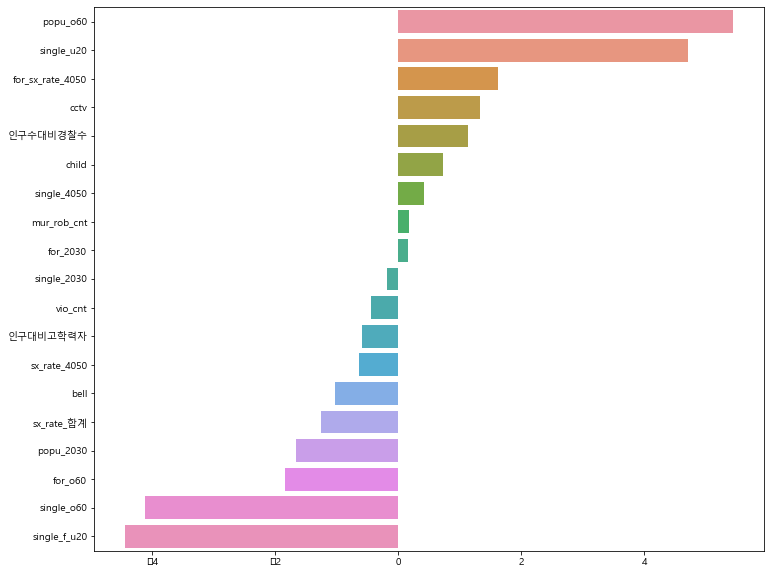

In [119]:
ft_series = pd.Series(ridge1.coef_, index =  a_1.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:]
# 시각화
plt.figure(figsize=(12,10))
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

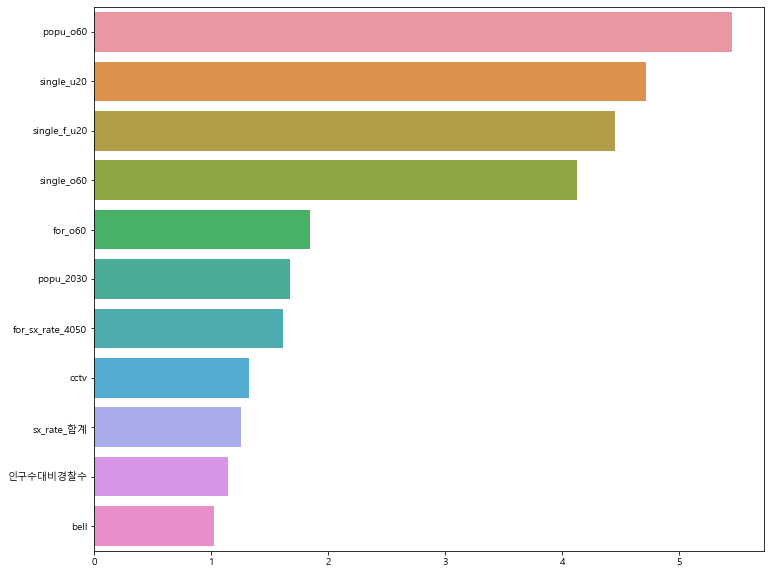

Index(['popu_o60', 'single_u20', 'single_f_u20', 'single_o60', 'for_o60',
       'popu_2030', 'for_sx_rate_4050', 'cctv', 'sx_rate_합계', '인구수대비경찰수',
       'bell'],
      dtype='object')


In [181]:
ft_series = pd.Series(ridge1.coef_, index =  a_1.columns)
ft_top20 = ft_series.abs().sort_values(ascending=False)[:11]
# 시각화
plt.figure(figsize=(12,10))
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()
print(ft_top20.index)

In [359]:
df['q1'][-82:] = y_pred1

In [360]:
df['q1']

0      75.200000
1      81.600000
2      77.300000
3      78.000000
4      78.600000
         ...    
323    75.795735
324    80.187529
325    76.462265
326    79.036367
327    75.207903
Name: q1, Length: 328, dtype: float64

In [348]:
dff = df[['jur_stn', 'year', 'q1']][-82 - 82: -82]

In [349]:
dff['q1_p'] = y_pred1

In [344]:
ytest1

164    77.5
165    85.8
166    81.2
167    80.4
168    76.5
       ... 
241    79.1
242    80.8
243    75.0
244    78.7
245    76.6
Name: q1, Length: 82, dtype: float64

In [350]:
dff

,jur_stn,year,q1,q1_p
164,서울중부경찰서,2019(상반기),77.5,78.847714
165,서울종로경찰서,2019(상반기),85.8,80.284567
166,서울남대문경찰서,2019(상반기),81.2,78.406198
167,서울서대문경찰서,2019(상반기),80.4,77.960041
168,서울혜화경찰서,2019(상반기),76.5,79.204578
...,...,...,...,...
241,창원서부경찰서,2019(하반기),79.1,74.834374
242,마산중부경찰서,2019(하반기),80.8,79.181107
243,마산동부경찰서,2019(하반기),75.0,75.359740
244,진주경찰서,2019(하반기),78.7,78.613104


In [351]:
dff.to_csv('q1_2019예측1.csv', index = False)

#### q2 강도살인

In [288]:
# 그리드 서치 후 최고 성능의 모델을 ela2에 저장

grid_search.fit(xtrain2, ytrain2)
ridge2 = grid_search.best_estimator_

In [82]:
# MAE 출력

y_pred2 = ridge2.predict(xtest2)
mean_absolute_error(ytest2, y_pred2)

1.976475809550926

In [80]:
ridge2 = Ridge(alpha = 0.01)
ridge2.fit(xtrain2, ytrain2)

Ridge(alpha=0.01)

In [81]:
# 결과

print('alpha =', ridge2.alpha)
print(ridge2.coef_) # Ridge 회귀분석으로 나온 weghit값
print('가장 강한 양의 상관관계: ',a_2.columns[ridge2.coef_.argmax()], '\n가장 강한 음의 상관관계: ', a_2.columns[ridge2.coef_.argmin()])

alpha = 0.01
[-0.68482898  0.1996281   1.13806041 -0.87037425  0.91943902  0.71751499
  7.00120584  1.25245452  0.31268876 -0.93527381 -2.69466897  1.41406293
 -0.36508443 -4.42895455 -5.77997129 -2.11804879 -0.48456018  5.51664586
 -0.51850331]
가장 강한 양의 상관관계:  mur_rob_cnt 
가장 강한 음의 상관관계:  single_o60


In [291]:
a_2.columns

Index(['vio_cnt', 'mur_rob_cnt', '인구수대비경찰수', 'bell', 'cctv', 'child',
       'popu_o60', 'for_2030', 'single_2030', 'sx_rate_합계', 'for_o60',
       'for_sx_rate_4050', 'single_4050', 'single_o60', 'single_f_u20',
       'popu_2030', 'sx_rate_4050', 'single_u20', '인구대비고학력자'],
      dtype='object')

In [292]:
pd.DataFrame({'column' : a_2.columns, 'coef': ridge2.coef_})

,column,coef
0,vio_cnt,-0.682163
1,mur_rob_cnt,0.200248
2,인구수대비경찰수,1.141474
3,bell,-0.873278
4,cctv,0.924803
5,child,0.720208
6,popu_o60,7.062740
7,for_2030,1.275980
8,single_2030,0.316365
9,sx_rate_합계,-0.931692


In [129]:
a_s2

,인구수대비경찰수,총범죄발생대비검거수,ofn_unknown,mur_rob_cnt,인구수대비검거수,ofn_m,vic_10,case_car_car,case_car_man,sx_rate_4050,ofn_10,교통사고범죄발생대비검거수,ofn_20,for_sx_rate_u20
0,0.803778,79.206107,0.029630,0,4.056421,0.814815,0.030418,0.703704,0.274074,99.8,0.015209,96.829971,0.152091,92.5
1,0.815122,73.816060,0.019608,0,2.735301,0.827451,0.012146,0.682353,0.282353,97.0,0.012000,110.891089,0.096000,67.1
2,0.772503,69.114126,0.019608,0,2.708451,0.835294,0.012346,0.713725,0.247059,99.8,0.004000,97.580645,0.100000,92.5
3,0.205076,81.954535,0.018868,0,1.088238,0.817610,0.037363,0.691176,0.266807,95.6,0.038462,106.567164,0.128205,60.2
4,0.604030,80.970670,0.034884,0,2.948937,0.837209,0.012146,0.694981,0.262548,97.0,0.007968,104.612546,0.143426,67.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.125000,132.026144,0.023669,2,1.104683,0.736686,0.027950,0.733728,0.218935,99.2,0.015152,103.271693,0.100000,99.0
242,0.162181,140.029218,0.009231,5,1.079520,0.741538,0.020339,0.649231,0.258462,102.3,0.021739,114.512923,0.108696,55.5
243,0.190703,132.447917,0.008230,8,1.321410,0.757202,0.055319,0.621399,0.345679,100.6,0.020747,110.838446,0.107884,90.8
244,0.147106,129.102921,0.014888,0,1.048378,0.739454,0.052632,0.588089,0.357320,99.3,0.035264,117.896175,0.143577,114.1


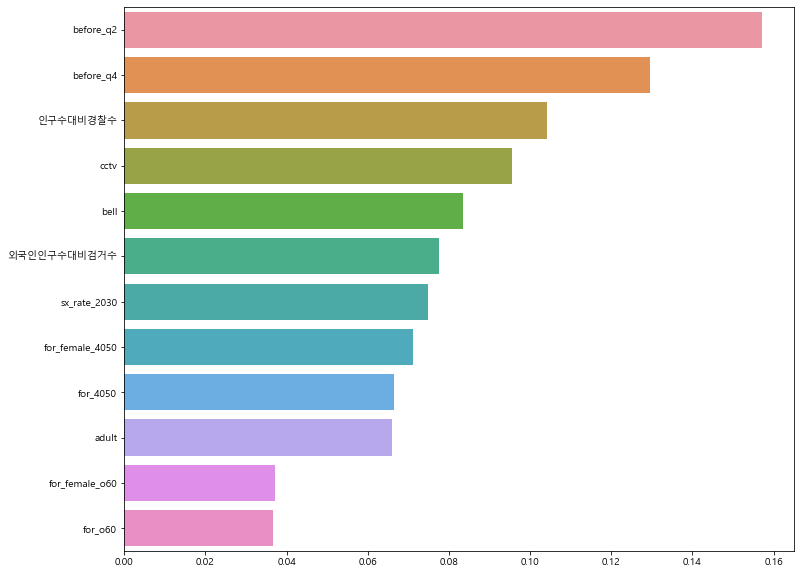

Index(['before_q2', 'before_q4', '인구수대비경찰수', 'cctv', 'bell', '외국인인구수대비검거수',
       'sx_rate_2030', 'for_female_4050', 'for_4050', 'adult',
       'for_female_o60', 'for_o60'],
      dtype='object')


In [168]:
from sklearn.ensemble import RandomForestRegressor
re2 = RandomForestRegressor(verbose=0, random_state=42, n_estimators=100, criterion = 'mae')
rf2 = re2.fit(xtrain2, ytrain2)
y_pred2 = rf2.predict(xtest2)
mean_absolute_error(ytest2, y_pred2)

ft_importance_values = rf2.feature_importances_
# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = a_s2.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(12,10))
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()
print(ft_top20.index)

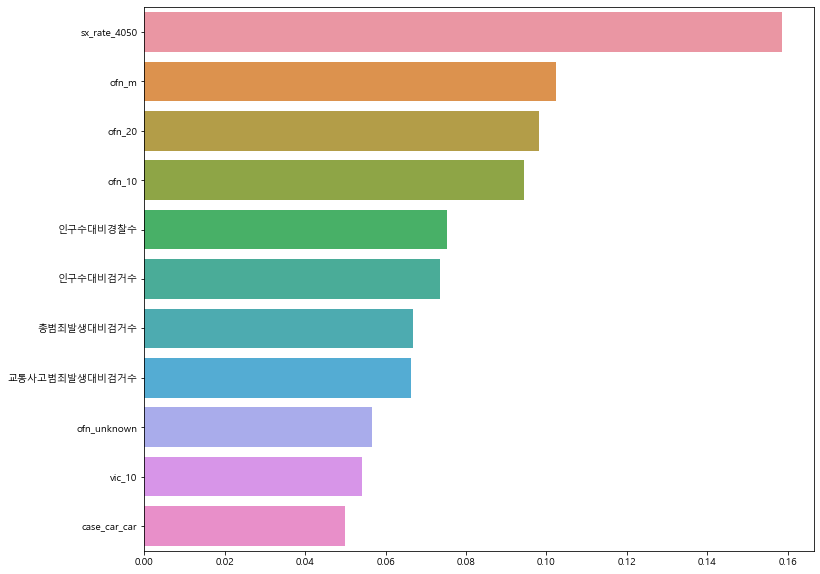

Index(['sx_rate_4050', 'ofn_m', 'ofn_20', 'ofn_10', '인구수대비경찰수', '인구수대비검거수',
       '총범죄발생대비검거수', '교통사고범죄발생대비검거수', 'ofn_unknown', 'vic_10', 'case_car_car'],
      dtype='object')


In [136]:
ft_series = pd.Series(ft_importance_values, index = a_s2.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:11]

# 시각화
plt.figure(figsize=(12,10))
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()
print(ft_top20.index)

#### q3 교통안전

In [60]:
# 그리드 서치 후 최고 성능의 모델을 lasso3에 저장

grid_search.fit(xtrain3, ytrain3)
ridge3 = grid_search.best_estimator_

In [86]:
a_3.columns

Index(['인구수대비경찰수', '총범죄발생대비검거수', 'ofn_unknown', 'mur_rob_cnt', '인구수대비검거수',
       'ofn_m', 'vic_10', 'case_car_car', 'case_car_man', 'sx_rate_4050',
       'ofn_10', '교통사고범죄발생대비검거수', 'ofn_20', 'for_sx_rate_u20'],
      dtype='object')

In [ ]:
'인구수대비경찰수', '총범죄발생대비검거수', 'ofn_unknown', 'mur_rob_cnt', '인구수대비검거수', 'ofn_m', 'vic_10', 'case_car_car', 'case_car_man', 'sx_rate_4050', 'ofn_10', '교통사고범죄발생대비검거수', 'ofn_20', 'for_sx_rate_u20'

In [91]:
ridge3 = Ridge(alpha = 0.03, max_iter = 10)
ridge3.fit(xtrain3, ytrain3)

Ridge(alpha=0.03, max_iter=10)

In [92]:
# MAE 출력

y_pred3 = ridge3.predict(xtest3)
mean_absolute_error(ytest3, y_pred3)

1.858757015179334

In [93]:
# 결과

print('alpha =', ridge3.alpha)
print(ridge3.coef_) # Ridge 회귀분석으로 나온 weghit값
print('가장 강한 양의 상관관계: ',a_3.columns[ridge3.coef_.argmax()], '\n가장 강한 음의 상관관계: ', a_3.columns[ridge3.coef_.argmin()])

alpha = 0.03
[ 6.66972855e+00  4.21326781e-02  1.06790993e+00  5.53896910e-02
 -5.88671086e-01 -7.19448527e+00  9.63443339e+00  3.23816111e+00
 -6.55321295e+00 -1.67639709e-01 -6.72141478e+00  5.70389467e-03
 -1.26634100e+01  3.52520212e-03]
가장 강한 양의 상관관계:  vic_10 
가장 강한 음의 상관관계:  ofn_20


In [177]:
ft_series[]

-7.194485273622867

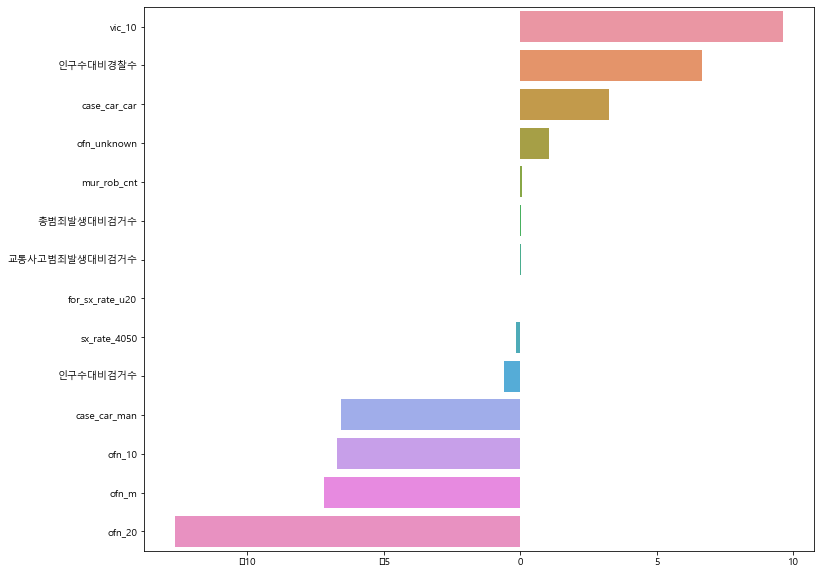

In [178]:
ft_series = pd.Series(ridge3.coef_, index =  a_3.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:]
# 시각화
plt.figure(figsize=(12, 10))
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

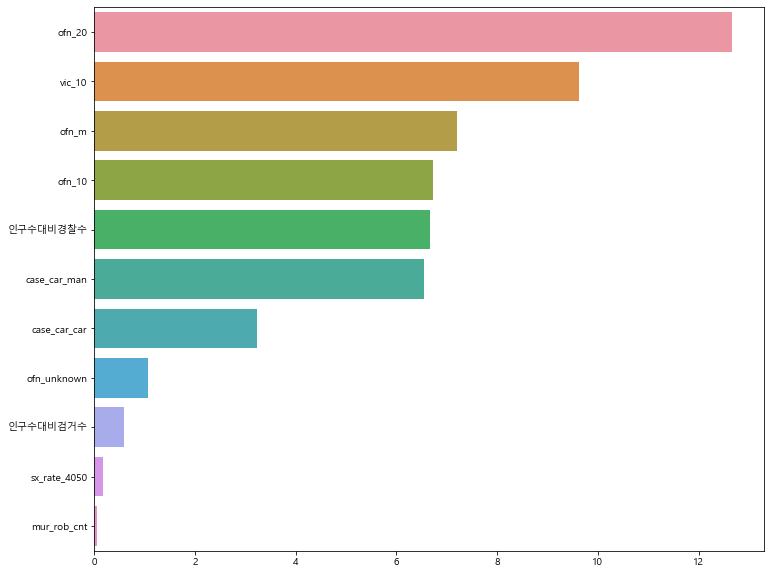

In [167]:
ft_series = pd.Series(ridge3.coef_, index =  a_3.columns)
ft_top20 = ft_series.abs().sort_values(ascending=False)[:11]
# 시각화
plt.figure(figsize=(12, 10))
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

#### q4 법질서 준수도

In [583]:
# 그리드 서치 후 최고 성능의 모델을 lasso4에 저장

grid_search.fit(xtrain4, ytrain4)
ridge4 = grid_search.best_estimator_

In [156]:
ridge4 = Ridge(alpha = 0.1, max_iter = 10)
ridge4.fit(xtrain4, ytrain4)

Ridge(alpha=0.1, max_iter=10)

ridge4 = Ridge(alpha = 50)
ridge4.fit(xtrain4, ytrain4)

In [157]:
# MAE 출력

y_pred4 = ridge4.predict(xtest4)
mean_absolute_error(ytest4, y_pred4)

1.9035506567965288

In [158]:
# 결과

print('alpha =', ridge4.alpha)
print(ridge4.coef_) # Ridge 회귀분석으로 나온 weghit값
print('가장 강한 양의 상관관계: ',a_4.columns[ridge4.coef_.argmax()], '\n가장 강한 음의 상관관계: ', a_4.columns[ridge4.coef_.argmin()])

alpha = 0.1
[ 1.51717878 -1.21465109 -1.03889175  0.69657801  2.04077652 -1.9351393
 -0.97261269 -3.59505025  0.49599853 -0.12122287 -0.13010795  0.85604107
 -0.37873015 -0.27643048  0.44059943  0.41026262]
가장 강한 양의 상관관계:  car_cnt 
가장 강한 음의 상관관계:  popu_female_2030


In [159]:
a_4.columns

Index(['before_q4', 'ofn_m', 'sx_rate_합계', 'before_q2', 'car_cnt', '인구수대비검거수',
       'sx_rate_u20', 'popu_female_2030', 'sx_rate_o60', 'bell',
       'for_female_합계', 'single_f_합계', 'before_q5', 'ofn_20', 'vio_cnt',
       'case_car_car'],
      dtype='object')

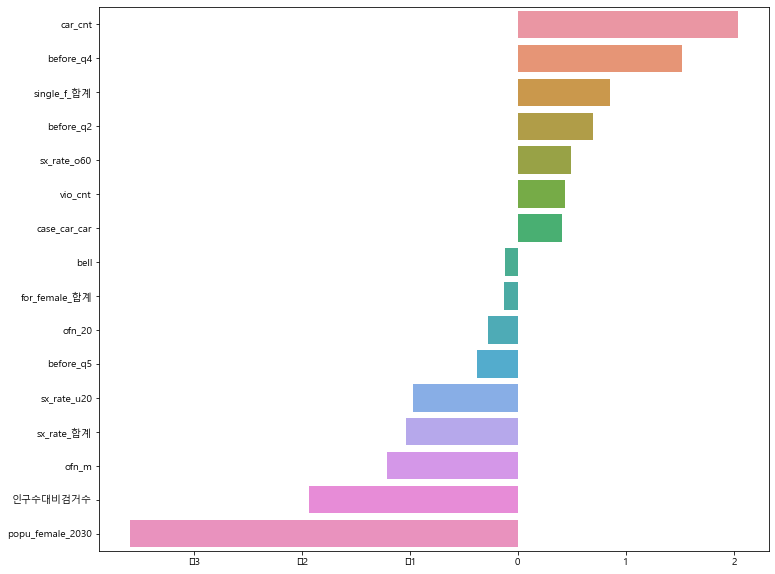

In [160]:
ft_series = pd.Series(ridge4.coef_, index =  a_4.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:]
# 시각화
plt.figure(figsize=(12,10))
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

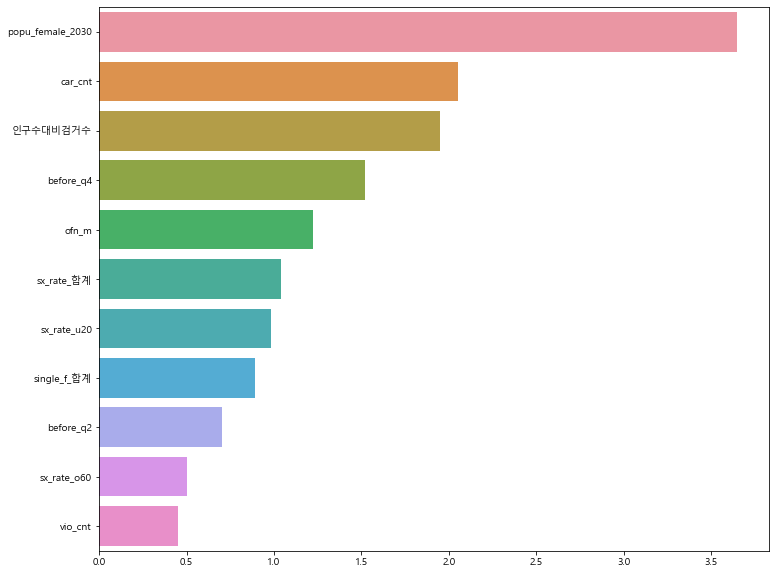

In [150]:
ft_series = pd.Series(ridge4.coef_, index =  a_4.columns)
ft_top20 = ft_series.abs().sort_values(ascending=False)[:11]
# 시각화
plt.figure(figsize=(12,10))
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

#### q5 전반적 안전도

In [350]:
# 그리드 서치 후 최고 성능의 모델을 lasso4에 저장

grid_search.fit(xtrain5, ytrain5)
ridge5 = grid_search.best_estimator_

In [105]:
ridge5 = Ridge(alpha = 0.03)
ridge5.fit(xtrain5, ytrain5)

Ridge(alpha=0.03)

In [106]:
# MAE 출력

y_pred5 = ridge5.predict(xtest5)
mean_absolute_error(ytest5, y_pred5)

1.7392993327711976

In [107]:
# 결과

print('alpha =', ridge5.alpha)
print(ridge5.coef_) # Ridge 회귀분석으로 나온 weghit값
print('가장 강한 양의 상관관계: ',a_5.columns[ridge5.coef_.argmax()], '\n가장 강한 음의 상관관계: ', a_5.columns[ridge5.coef_.argmin()])

alpha = 0.03
[-0.82010471 -0.93206732 -1.68192287 -3.77912028  4.11827983  1.26438474
  0.61773211 -1.45849571 -2.21493551 -0.18815898  0.11542079  3.82755084
 -0.17027883  0.86069408  0.30072672 -0.09665673 -0.68975667  4.24252427
  0.21321456  0.35674842 -4.78091035 -0.20742305 -0.33871859 -3.60232265
  2.343039   -0.47446629  0.92183543  0.19575377  0.24653021 -0.30270658
 -0.46849617 -2.27214272 -0.19760119 -0.09645606]
가장 강한 양의 상관관계:  single_o60 
가장 강한 음의 상관관계:  single_f_합계


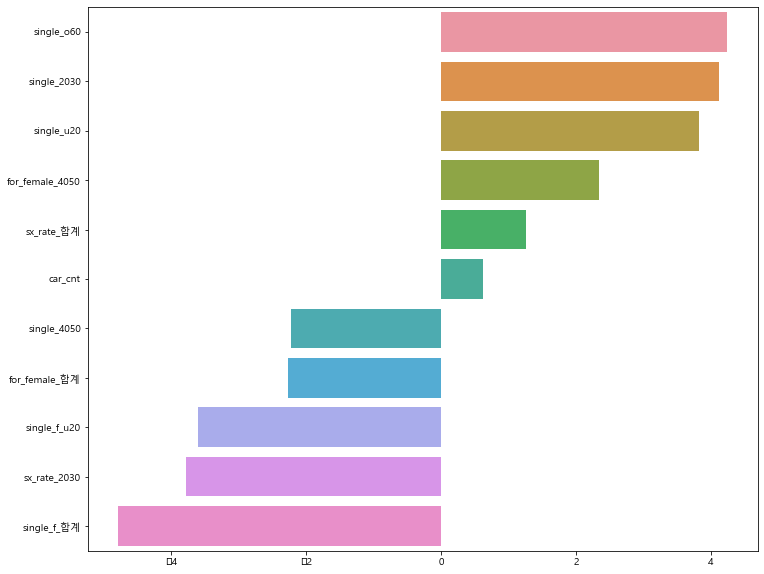

Index(['single_o60', 'single_2030', 'single_u20', 'for_female_4050',
       'sx_rate_합계', 'car_cnt', 'single_4050', 'for_female_합계', 'single_f_u20',
       'sx_rate_2030', 'single_f_합계'],
      dtype='object')


In [189]:
ft_series = pd.Series(ridge5.coef_, index =  a_5.columns)
ft_top20 = a.sort_values(ascending=False)[:]
# 시각화
plt.figure(figsize=(12,10))
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()
print(ft_top20.index)

In [188]:
a = ft_series[['single_o60', 'single_2030', 'single_u20', 'for_female_4050',
       'sx_rate_합계', 'car_cnt','single_4050',
       'for_female_합계', 'single_f_u20', 'sx_rate_2030', 'single_f_합계']]

In [187]:
ft_series.index

Index(['for_o60', 'ofn_m', 'sx_rate_4050', 'sx_rate_2030', 'single_2030',
       'sx_rate_합계', 'car_cnt', 'popu_female_2030', 'single_4050', 'before_q5',
       'before_q2', 'single_u20', 'for_female_o60', 'sx_rate_o60',
       'mur_rob_cnt', 'child', '인구대비고학력자', 'single_o60', 'before_q4',
       'case_car_car', 'single_f_합계', 'bell', '인구수대비경찰수', 'single_f_u20',
       'for_female_4050', '외국인인구수대비검거수', 'for_sx_rate_4050', '인구수대비검거수',
       'adult', 'ofn_20', 'sx_rate_u20', 'for_female_합계', 'cctv', 'vio_cnt'],
      dtype='object')

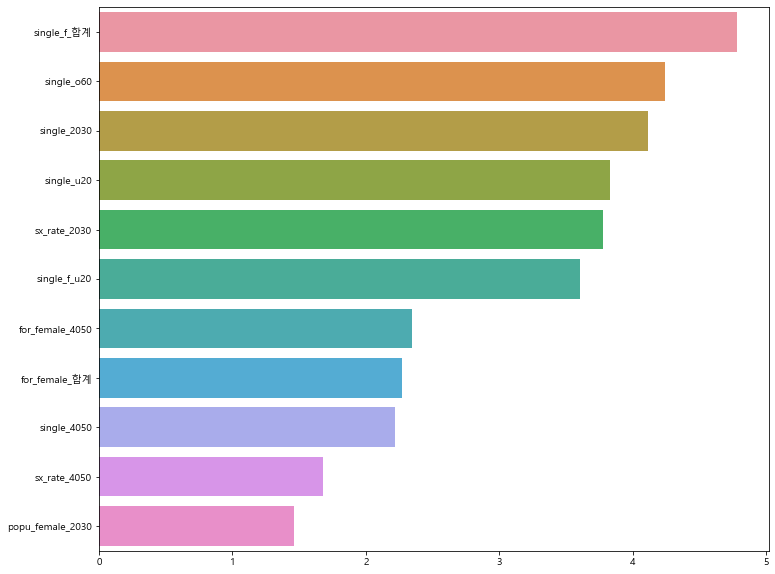

In [139]:
ft_series = pd.Series(ridge5.coef_, index =  a_5.columns)
ft_top20 = ft_series.abs().sort_values(ascending=False)[:11]
# 시각화
plt.figure(figsize=(12,10))
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

In [649]:
# Catboost 호출
from catboost import CatBoostRegressor
# 그리드 서치 패키지
from sklearn.model_selection import GridSearchCV

In [650]:
param_grid = {'n_estimators' : np.linspace(1, 100, 30)}
grid_search = GridSearchCV(CatBoostRegressor(),param_grid=param_grid, cv = 5, n_jobs = -1, scoring ='neg_mean_absolute_error')
grid_search.fit(xtrain1, ytrain1)
cat_q1_full = grid_search.best_estimator_

Learning rate set to 0.200044
0:	learn: 3.1847224	total: 133ms	remaining: 13.2s
1:	learn: 2.9563770	total: 135ms	remaining: 6.62s
2:	learn: 2.8155636	total: 137ms	remaining: 4.42s
3:	learn: 2.6477873	total: 139ms	remaining: 3.32s
4:	learn: 2.4917699	total: 140ms	remaining: 2.66s
5:	learn: 2.3581271	total: 142ms	remaining: 2.23s
6:	learn: 2.2652749	total: 144ms	remaining: 1.91s
7:	learn: 2.1913242	total: 146ms	remaining: 1.67s
8:	learn: 2.1396174	total: 147ms	remaining: 1.49s
9:	learn: 2.0833141	total: 149ms	remaining: 1.34s
10:	learn: 2.0336547	total: 151ms	remaining: 1.22s
11:	learn: 1.9715280	total: 152ms	remaining: 1.12s
12:	learn: 1.9172621	total: 154ms	remaining: 1.03s
13:	learn: 1.8832247	total: 156ms	remaining: 956ms
14:	learn: 1.8579146	total: 158ms	remaining: 893ms
15:	learn: 1.8366276	total: 159ms	remaining: 832ms
16:	learn: 1.7821652	total: 160ms	remaining: 782ms
17:	learn: 1.7470984	total: 162ms	remaining: 738ms
18:	learn: 1.7116201	total: 164ms	remaining: 698ms
19:	learn: 

In [654]:
# MAE 출력
mean_absolute_error(cat_q1_full.predict(xtest1),ytest1)

2.4522485221137678